In [41]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr 
from pathlib import Path
import numpy as np

In [42]:
# Store filepath into variable
healthcare_dataset_csv = Path("Data/healthcare_dataset.csv")

In [43]:
# Reading in file.
# adding three boolean columns for all the 3 diseases(0 = 'FALSE', 1 = 'TRUE').
healthcare_dataset_df = pd.read_csv(healthcare_dataset_csv, low_memory=False)
healthcare_dataset_df['hypertension_bool'] = healthcare_dataset_df['hypertension'].astype(bool)
healthcare_dataset_df['heart_disease_bool'] = healthcare_dataset_df['heart_disease'].astype(bool)
healthcare_dataset_df['diabetes_bool'] = healthcare_dataset_df['diabetes'].astype(bool)
healthcare_dataset_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,hypertension_bool,heart_disease_bool,diabetes_bool
0,Female,80.0,0,1,never,25.19,6.6,140,0,False,True,False
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,False,False,False
2,Male,28.0,0,0,never,27.32,5.7,158,0,False,False,False
3,Female,36.0,0,0,current,23.45,5.0,155,0,False,False,False
4,Male,76.0,1,1,current,20.14,4.8,155,0,True,True,False


In [44]:
#handling missing values
healthcare_dataset_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
hypertension_bool      0
heart_disease_bool     0
diabetes_bool          0
dtype: int64

In [45]:
# removing duplicate rows.
healthcare_dataset_df = healthcare_dataset_df.drop_duplicates()

In [46]:
# renaming the Column header Names:
healthcare_dataset_df.columns = healthcare_dataset_df.columns.str.upper()
healthcare_dataset_df.head()

,GENDER,AGE,HYPERTENSION,HEART_DISEASE,SMOKING_HISTORY,BMI,HBA1C_LEVEL,BLOOD_GLUCOSE_LEVEL,DIABETES,HYPERTENSION_BOOL,HEART_DISEASE_BOOL,DIABETES_BOOL
0,Female,80.0,0,1,never,25.19,6.6,140,0,False,True,False
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,False,False,False
2,Male,28.0,0,0,never,27.32,5.7,158,0,False,False,False
3,Female,36.0,0,0,current,23.45,5.0,155,0,False,False,False
4,Male,76.0,1,1,current,20.14,4.8,155,0,True,True,False


In [47]:
# Converting Data Types:
healthcare_dataset_df['AGE'] = healthcare_dataset_df['AGE'].astype(int)
healthcare_dataset_df['BLOOD_GLUCOSE_LEVEL'] = healthcare_dataset_df['BLOOD_GLUCOSE_LEVEL'].astype(float)
healthcare_dataset_df.head()

,GENDER,AGE,HYPERTENSION,HEART_DISEASE,SMOKING_HISTORY,BMI,HBA1C_LEVEL,BLOOD_GLUCOSE_LEVEL,DIABETES,HYPERTENSION_BOOL,HEART_DISEASE_BOOL,DIABETES_BOOL
0,Female,80,0,1,never,25.19,6.6,140.0,0,False,True,False
1,Female,54,0,0,No Info,27.32,6.6,80.0,0,False,False,False
2,Male,28,0,0,never,27.32,5.7,158.0,0,False,False,False
3,Female,36,0,0,current,23.45,5.0,155.0,0,False,False,False
4,Male,76,1,1,current,20.14,4.8,155.0,0,True,True,False


In [48]:
# Calculate correlation coefficient between age and hypertension
correlation_age_hypertension, _ = pearsonr(healthcare_dataset_df['AGE'], healthcare_dataset_df['HYPERTENSION_BOOL'])
print(f"Correlation between age and hypertension is : {correlation_age_hypertension:.2f}")

Correlation between age and hypertension is : 0.26


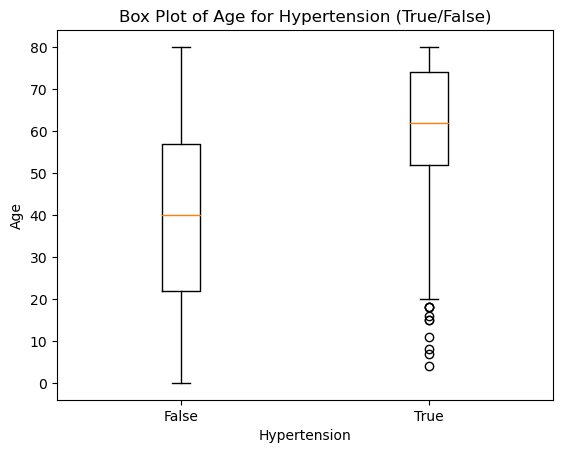

In [49]:
# Plotting the correlation between age and hypertension
labels = healthcare_dataset_df['HYPERTENSION_BOOL'].unique()
data = [healthcare_dataset_df[healthcare_dataset_df['HYPERTENSION_BOOL'] == label]['AGE'] for label in labels]

plt.boxplot(data, labels=labels)
plt.title('Box Plot of Age for Hypertension (True/False)')
plt.xlabel('Hypertension')
plt.ylabel('Age')
plt.show()

In [50]:
# Calculate correlation coefficient between age and heart_disease
correlation_age_heart_disease, _ = pearsonr(healthcare_dataset_df['AGE'], healthcare_dataset_df['HEART_DISEASE_BOOL'])
print(f"Correlation between age and heart disease is : {correlation_age_heart_disease:.2f}")

Correlation between age and heart disease is : 0.24


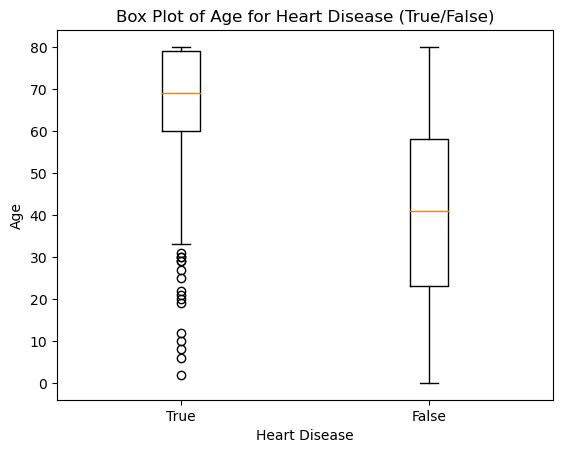

In [51]:
# Plotting the correlation between age and heart disease
labels = healthcare_dataset_df['HEART_DISEASE_BOOL'].unique()
data = [healthcare_dataset_df[healthcare_dataset_df['HEART_DISEASE_BOOL'] == label]['AGE'] for label in labels]

plt.boxplot(data, labels=labels)
plt.title('Box Plot of Age for Heart Disease (True/False)')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show()

In [52]:
# Extract relevant columns
bmi = healthcare_dataset_df['BMI']
blood_glucose_level = healthcare_dataset_df['BLOOD_GLUCOSE_LEVEL']
diabetes = healthcare_dataset_df['DIABETES']

In [53]:
# Calculate correlation between bmi and diabetes and blood glucose level and diabetes
correlation_diabetes_glucose = diabetes.corr(blood_glucose_level)
correlation_diabetes_bmi = diabetes.corr(bmi)

# Print correlation
print(f'Correlation between blood glucose level and diabetes: {correlation_diabetes_glucose}')
print(f'Correlation between BMI and diabetes: {correlation_diabetes_bmi}')

Correlation between blood glucose level and diabetes: 0.42433583557906723
Correlation between BMI and diabetes: 0.21493169995887634


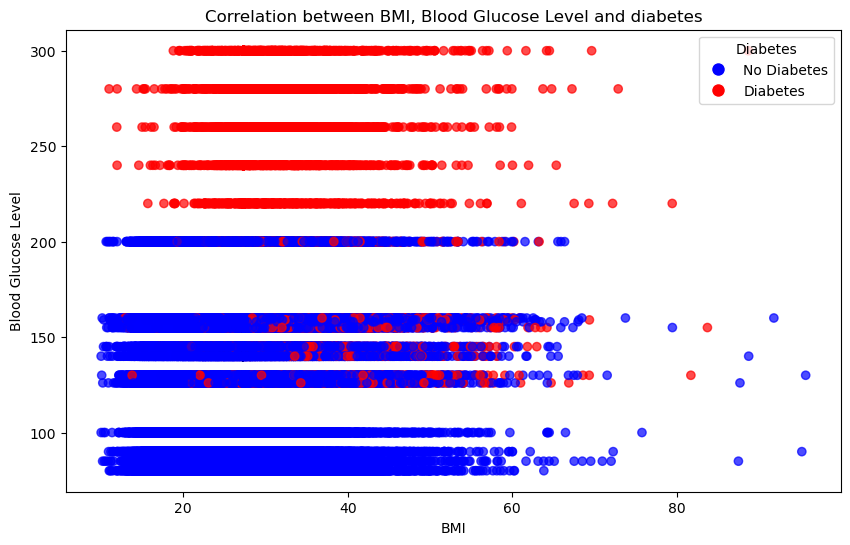

In [54]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
colors = ['blue' if status == 0 else 'red' for status in diabetes]
plt.scatter(bmi, blood_glucose_level, c=colors, alpha=0.7)
plt.title('Correlation between BMI, Blood Glucose Level and diabetes')
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Diabetes'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Diabetes')],
           title='Diabetes', loc='upper right')
plt.show()

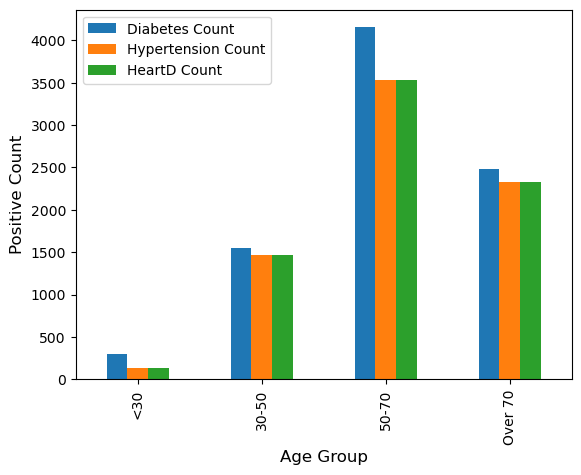

In [55]:
#Question 4 & 5: Distribution of diabetes, heart disease and hypertension across age groups
#Create binsand labels by age
bins = [0, 30, 50, 70, 90]
ranges = ['<30', '30-50', '50-70', 'Over 70']

#Bin subjects by age-group and pull those where Diabetes == 1
healthcare_dataset_df['Age Group'] = pd.cut(healthcare_dataset_df['AGE'], bins, labels=ranges)

#diabetes == 1
diabetes_df = healthcare_dataset_df[healthcare_dataset_df['DIABETES'].astype('int') == 1]
#Get count by age group 
diabetes_data = diabetes_df.groupby("Age Group", observed=False)['DIABETES'].agg('count')
diabetes_age_df = pd.DataFrame({'Age Group': diabetes_data.index, "Diabetes Count": diabetes_data.values})

#hypertension == 1
hypertension_df = healthcare_dataset_df[healthcare_dataset_df['HYPERTENSION'].astype('int') == 1]
#Get count by age group 
hyper_data = hypertension_df.groupby("Age Group", observed=False)['HYPERTENSION'].agg('count')
hypertension_age_df = pd.DataFrame({'Age Group': hyper_data.index, "Hypertension Count": hyper_data.values})

#heart disease == 1
heart_disease_df = healthcare_dataset_df[healthcare_dataset_df['HEART_DISEASE'].astype('int') == 1]
#Get count by age group
heartd_data = hypertension_df.groupby("Age Group", observed=False)['HEART_DISEASE'].agg('count')
heartd_by_age_df = pd.DataFrame({'Age Group': heartd_data.index, "HeartD Count": heartd_data.values})

#Merge all into single df
all_health_df = diabetes_age_df.merge(hypertension_age_df, on='Age Group', how='left')
all_health_df = all_health_df.merge(heartd_by_age_df, on='Age Group', how = 'left')

#plot on chart
all_health_df.plot(kind='bar')
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Positive Count", fontsize=12)
plt.xticks(np.arange(4), all_health_df['Age Group'], rotation=90)
plt.savefig('Images/Health-by-Age.png')
plt.show()


In [56]:
#Question 6: Correlation between hbA1c/diabetes and heart disease/hypertension
diabetes_hyper = healthcare_dataset_df['DIABETES'].corr(healthcare_dataset_df['HYPERTENSION'])
diabetes_heartd = healthcare_dataset_df['DIABETES'].corr(healthcare_dataset_df['HEART_DISEASE'])

#Display correlation for each comparison
print(f'Correlation for diabetes to hypertension is {diabetes_hyper}.')
print(f'Correlation for diabetes to heart disease is {diabetes_heartd}.')

diabetes_hyper_df = healthcare_dataset_df[(healthcare_dataset_df['DIABETES'] == 1) & (healthcare_dataset_df['HYPERTENSION'] == 1)]


Correlation for diabetes to hypertension is 0.19570970179625766.
Correlation for diabetes to heart disease is 0.17071089766632194.
